In [1]:
import os
import sys
import numpy as np
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_settings_v3 import *
from plot_auxiliary import *
from planar import create_proximity_graph
from auxiliary import get_base_network_name
from auxiliary import getLinearReg

%matplotlib inline

net_type = 'DT'
param = 'param'

net_dir = os.path.join('..', 'networks', net_type)

In [10]:
N_values = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
N_values = [16384]
iterations = 100
d_values = {}
for N in N_values:
    diameters = np.zeros(iterations)
    for i in range(iterations):
        g = create_proximity_graph('PDT', N=N)
        d = g.diameter()
        diameters[i] = d
    print(N, diameters.mean())
    d_values[N] = diameters

KeyboardInterrupt: 

In [9]:
N_values = [
    #128, 256, 512, 1024, 2048, 4096, 8192, 
    16384
]
#N_values = [16384]
iterations = 10
meanl_values = {}
for N in N_values:
    meanls = np.zeros(iterations)
    for i in range(iterations):
        g = create_proximity_graph('PDT', N=N)
        meanl = g.average_path_length(directed=False)
        meanls[i] = meanl
    print(N, meanls.mean())
    meanl_values[N] = meanls

KeyboardInterrupt: 

In [2]:
## DT
diameters = [9.37, 12.42, 15.94, 20.66, 27.25, 36.01, 48.5, 64.7]
meanls = [4.721,  6.177,  8.102, 10.801, 13.946, 18.562, 24.187, 32.666]

## PDT
#diameters = [7.71, 10.41, 14.13, 19.46, 26.73, 36.67, 50.61, 70.033]
#meanls = [4.027,  5.487,  7.444, 10.183, 14.015, 19.277, 26.814, 37.227]

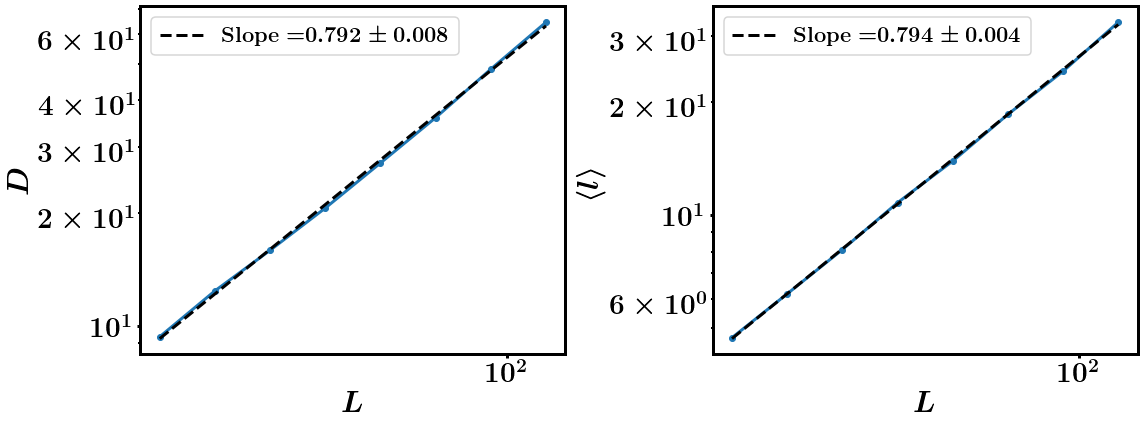

In [3]:
N_values =  [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
L_values = np.sqrt(N_values)
X = L_values

fig, axes = plt.subplots(figsize=(16,6), ncols=2)

ax = axes[0]
ax.set_ylabel(r'$D$')
ax = axes[1]
ax.set_ylabel(r'$\langle l \rangle$')

for ax, Y in zip(axes, [diameters, meanls]):

    ax.set_xlabel(r'$L$')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(X, Y, 'o-')

    Y_pred, slope, y_err = getLinearReg(X, Y)    
    c = Y[0] / X[0]**slope
    label = r'$\mathrm{Slope} = $' + r'${{{:.3f}}}\pm{{{:.3f}}}$'.format(slope, y_err)
    ax.plot(X, Y_pred, '--', color='k', label=label)
    ax.legend(fontsize=22)

plt.tight_layout()

fig_name = os.path.join(fig_dir, 'D_and_meanl_vs_L_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')
plt.show()